# Curvas de Aprendizado

In [3]:
from aurelio.plotter import collect, collect_zip, collect_glove_zip, collect_dim
import os
import pandas as pd
import seaborn as sns

In [5]:
exps = [
    "no_elmo",
    "elmo",
    "kfold_reduced_elmo",
    "kfold_no_glove",
    "single_fold_no_elmo",
    "single_fold_no_elmo_reduced",
    "single_fold_elmo",
    "single_fold_elmo_reduced",
    "kfold_dev_reduced_elmo",
    "kfold_dev_reduced_no_elmo",
]

dfs = {}
for exp in exps:
    if ".zip" not in exp:
        path = "metrics_old/{}".format(exp)
        dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
    else:
        path = "metrics_old/zip/{}".format(exp)
        dfs[exp] = pd.DataFrame.from_records(collect_zip(path, exp))

dfs["metrics_glove_dimensions.zip"] = pd.DataFrame.from_records(collect_glove_zip("metrics_old/zip/metrics_glove_dimensions.zip", 
                                                                                  "metrics_glove_dimensions.zip"))

dfs["elmo_expanded_100"] = pd.DataFrame.from_records(collect_dim("metrics/elmo_expanded_100",
                                                                 "elmo_expanded_100"))

dfs["elmo_expanded_100"].head()

,best_epoch,best_validation_em,best_validation_end_acc,best_validation_f1,best_validation_loss,best_validation_span_acc,best_validation_start_acc,dim,epoch,fold,...,training_loss,training_span_acc,training_start_acc,training_start_epoch,validation_em,validation_end_acc,validation_f1,validation_loss,validation_span_acc,validation_start_acc
0,14,0.066667,0.111111,0.200950,10.849638,0.044444,0.077778,100,19,8,...,0.858621,0.613636,0.719697,0,0.033333,0.111111,0.197392,10.913254,0.022222,0.111111
1,2,0.122222,0.144444,0.275183,7.393431,0.077778,0.166667,100,11,2,...,1.189785,0.483571,0.667857,0,0.122222,0.166667,0.303266,9.260477,0.088889,0.211111
2,7,0.211111,0.211111,0.368594,8.786099,0.144444,0.211111,100,16,8,...,0.949555,0.541867,0.707411,0,0.155556,0.188889,0.339130,10.560503,0.100000,0.211111
3,5,0.033333,0.077778,0.230035,8.591649,0.011111,0.033333,100,14,10,...,1.045105,0.573034,0.662921,0,0.011111,0.088889,0.192771,10.353333,0.000000,0.033333
4,7,0.177778,0.233333,0.343412,8.795136,0.122222,0.166667,100,16,8,...,1.081451,0.533951,0.669753,0,0.100000,0.211111,0.262398,10.853510,0.088889,0.133333


In [15]:
def plot(dfs, names, x, y, legend=None):
    dfs = pd.concat([dfs[name] for name in names])
    sns.set(rc={'figure.figsize':(15,10)})
    p = sns.lineplot(x=x, y=y, data=dfs, hue="name")
    if legend is not None:
        for t, l in zip(p.legend().texts, legend):
            t.set_text(l)
    p

## ELMO vs no ELMO vs no GLOVE: k-fold / respostas múltiplas

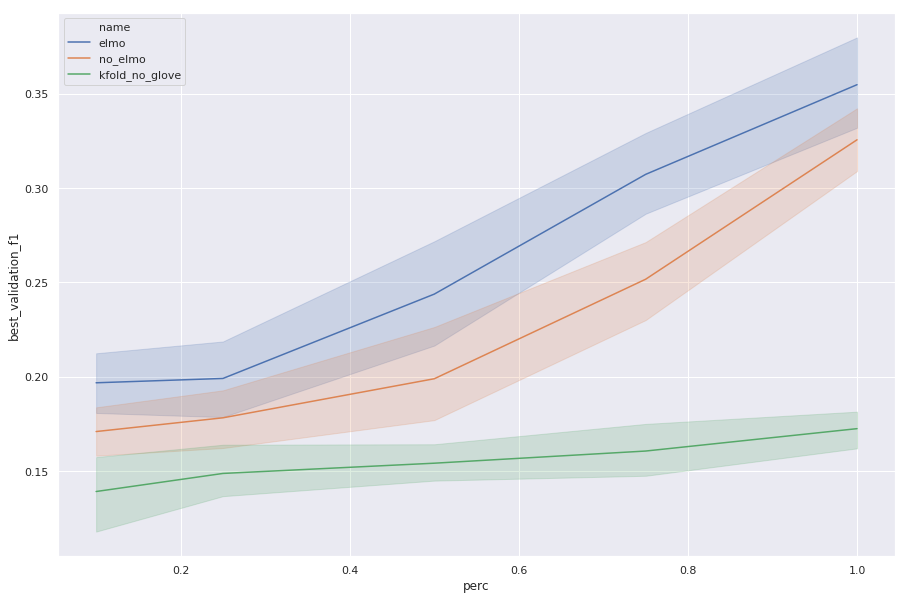

In [11]:
plot(dfs, ["elmo", "no_elmo", "kfold_no_glove"], "perc", "best_validation_f1")

## Resposta única (DEV) vs Resposta Múltipla (DEV) vs Resposta Múltipla (TRAIN+DEV) : ELMO / kfold

/home/eraldo/miniconda2/envs/allen/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




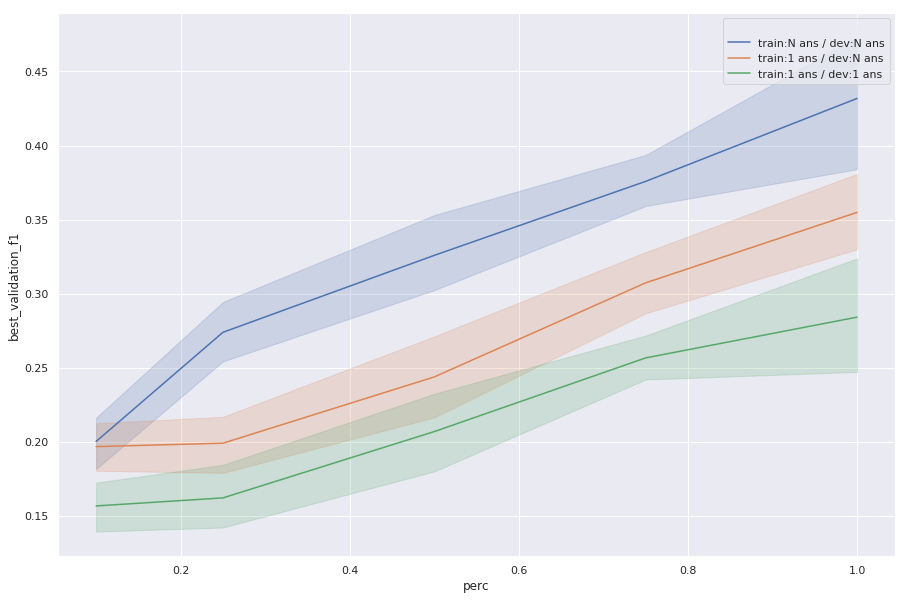

In [17]:
plot(dfs, ["elmo_expanded_100", "elmo", "kfold_dev_reduced_elmo"], "perc", "best_validation_f1", legend=[None, "train:N ans / dev:N ans", "train:1 ans / dev:N ans", "train:1 ans / dev:1 ans"])

## Resposta única (DEV) vs Resposta Múltipla (DEV) : ELMO / kfold

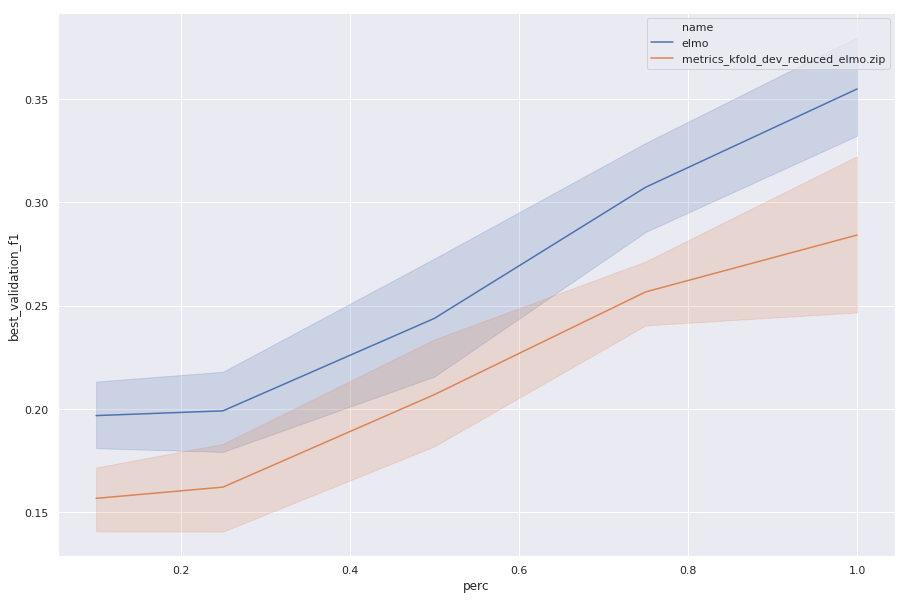

In [5]:
plot(dfs, ["elmo", "metrics_kfold_dev_reduced_elmo.zip"], "perc", "best_validation_f1")

## Resposta única (DEV) vs Resposta Múltipla (DEV) : sem ELMO / kfold

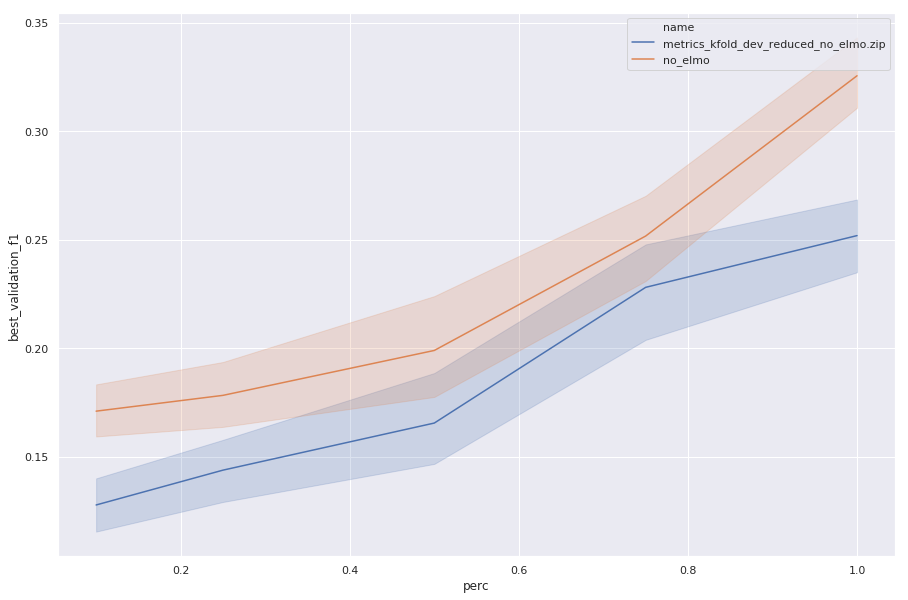

In [6]:
plot(dfs, ["metrics_kfold_dev_reduced_no_elmo.zip", "no_elmo"], "perc", "best_validation_f1")

## ELMO vs no ELMO: holdout / respostas múltiplas

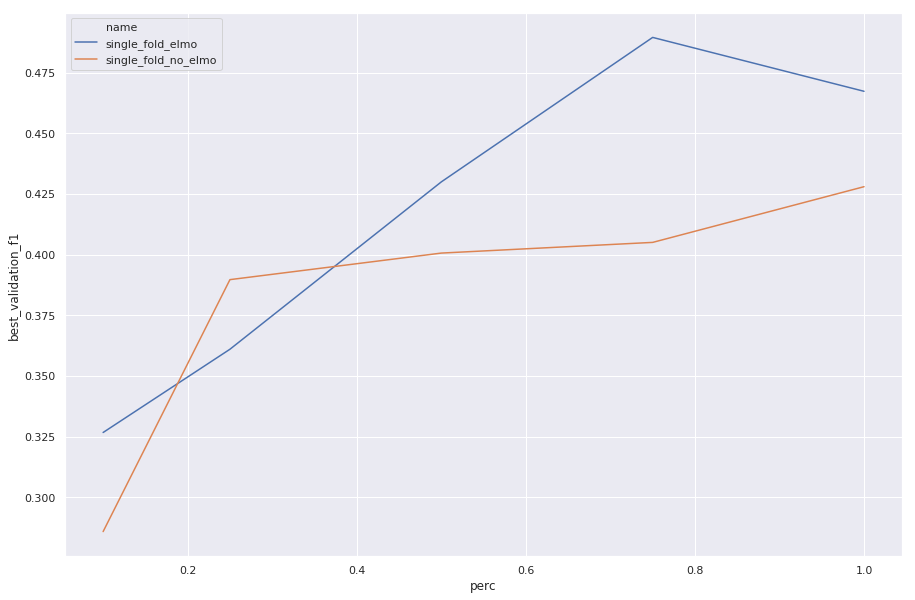

In [7]:
plot(dfs, ["single_fold_elmo", "single_fold_no_elmo"], "perc", "best_validation_f1")

## Respostas múltiplas vs simples: ELMO / holdout

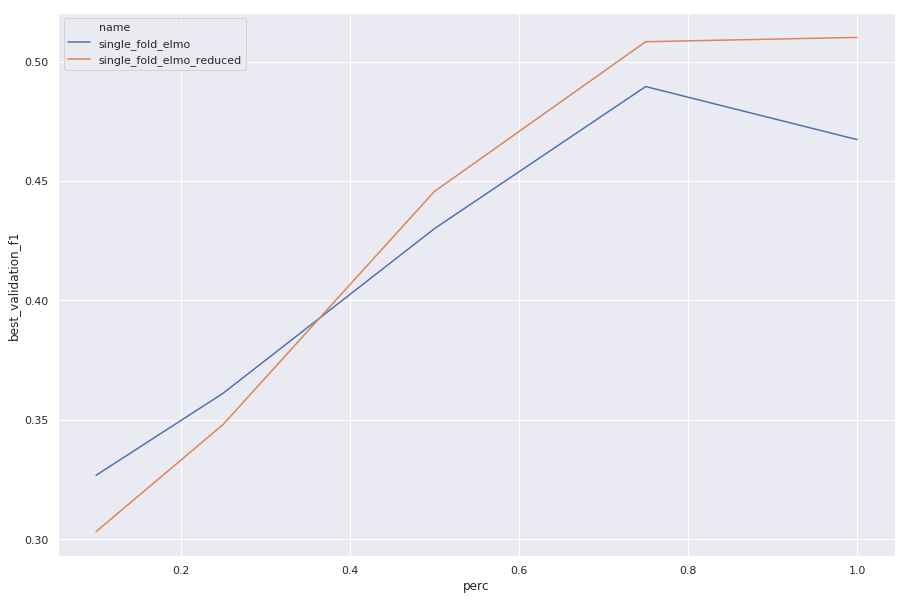

In [8]:
plot(dfs, ["single_fold_elmo", "single_fold_elmo_reduced"], "perc", "best_validation_f1")

## Respostas múltiplas vs simples: ELMO / holdout

/home/eraldo/miniconda2/envs/allen/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




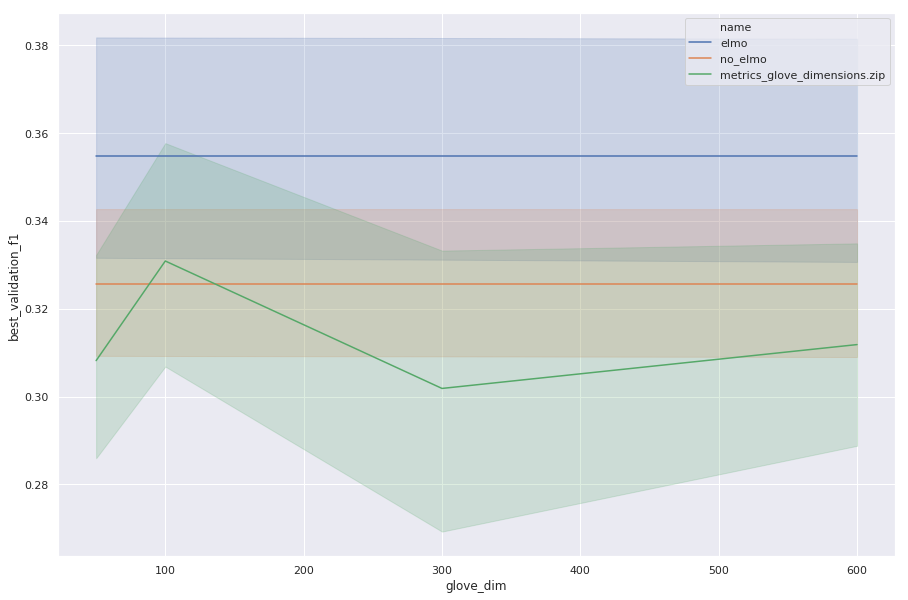

In [9]:
dfs["elmo_perc_1.0"] = dfs["elmo"][dfs["elmo"].perc == 1.0].copy()
dfs["no_elmo_perc_1.0"] = dfs["no_elmo"][dfs["no_elmo"].perc == 1.0].copy()

df = dfs["elmo_perc_1.0"]
df.loc[:,"glove_dim"] = 50
df2 = df.copy()
df2.loc[:,"glove_dim"] = 600
dfs["elmo_perc_1.0"] = pd.concat([df, df2])

df = dfs["no_elmo_perc_1.0"]
df.loc[:,"glove_dim"] = 50
df2 = df.copy()
df2.loc[:,"glove_dim"] = 600
dfs["no_elmo_perc_1.0"] = pd.concat([df, df2])

plot(dfs, ["elmo_perc_1.0", "no_elmo_perc_1.0", "metrics_glove_dimensions.zip"], "glove_dim", "best_validation_f1")

## Respostas múltiplas vs simples (100% train only): ELMO / k-fold

In [10]:
percs = dfs["elmo"].perc.unique()
df = dfs["kfold_reduced_elmo"]
df_new = df.copy()
df_new.perc = 0.1

df = pd.concat([df, df_new])

# dfs_new = []
# for perc in percs:
#     df_new = df.copy()
#     df_new.perc = perc
#     dfs_new.append(df_new)
# df = pd.concat(dfs_new)

# display(df)

# df = df[["name", "perc", "best_validation_f1"]].groupby(["name", "perc"]).agg(["mean", "std"])
# display(df)

# df = dfs["elmo"][["name", "perc", "best_validation_f1"]].groupby(["name", "perc"]).agg(["mean", "std"])
# display(df)

dfs["kfold_reduced_elmo_exp"] = df

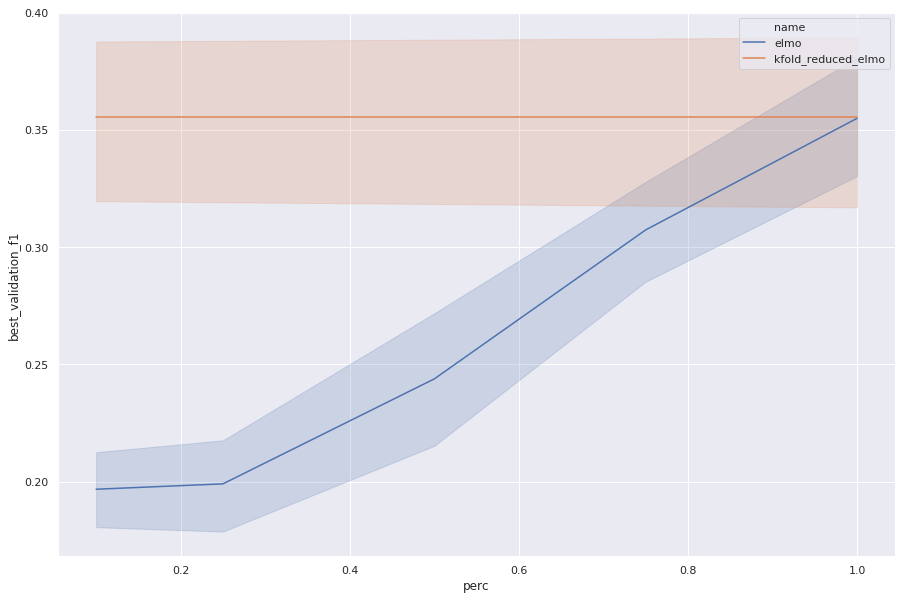

In [12]:
plot(dfs, ["elmo", "kfold_reduced_elmo_exp"], "perc", "best_validation_f1")